In [116]:
import numpy as np # linear algebra
import pandas as pd

In [117]:
df=pd.read_csv('/content/Musical_instruments_reviews.csv')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [118]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [119]:
#drop the unnecessary features from the dataset
df=df.drop(['reviewerID','asin','reviewerName','unixReviewTime','reviewTime','summary'],axis=1)

In [120]:
df.isnull().sum()

helpful       0
reviewText    7
overall       0
dtype: int64

In [121]:
df=df.drop('helpful',axis=1)

In [122]:
df.isnull().sum()

reviewText    7
overall       0
dtype: int64

In [123]:
df=df.dropna() # used to remove rows and columns with Null/NaN values.

In [124]:
df

,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0
...,...,...
10256,"Great, just as expected. Thank to all.",5.0
10257,I've been thinking about trying the Nanoweb st...,5.0
10258,I have tried coated strings in the past ( incl...,4.0
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",4.0


In [125]:
#lets create a binary rating i.e '1' if overall rating is greater than equal to 3 and '0' if less than 3 
df['overall']=np.where(df['overall']>=3,1,0)

In [126]:
df

,reviewText,overall
0,"Not much to write about here, but it does exac...",1
1,The product does exactly as it should and is q...,1
2,The primary job of this device is to block the...,1
3,Nice windscreen protects my MXL mic and preven...,1
4,This pop filter is great. It looks and perform...,1
...,...,...
10256,"Great, just as expected. Thank to all.",1
10257,I've been thinking about trying the Nanoweb st...,1
10258,I have tried coated strings in the past ( incl...,1
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",1


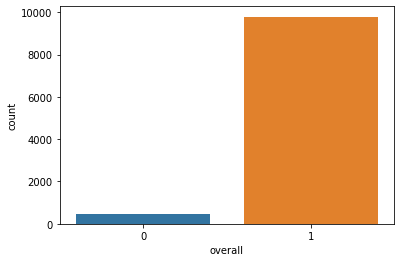

In [127]:
import seaborn as sns
sns.countplot(x=df['overall'],data=df)

In [128]:
df['overall'].value_counts()

1    9787
0     467
Name: overall, dtype: int64

In [129]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [130]:
df['reviewText']=df['reviewText'].apply(text_cleaning)

In [131]:
x=df['reviewText']
y=df['overall']

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

In [134]:
cv=CountVectorizer(ngram_range=(1,3))
x_train_trans=cv.fit_transform(x_train)

In [135]:
x_train_trans

<7177x663250 sparse matrix of type '<class 'numpy.int64'>'
	with 1574596 stored elements in Compressed Sparse Row format>

In [136]:
x_train.size   #number of reviews used for training


7177

In [137]:
x_test.size # number of reviews used for testing


3077

In [138]:
#Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
lr=LogisticRegression(max_iter=10000)

In [140]:
lr.fit(x_train_trans,y_train)
pred_1=lr.predict(cv.transform(x_test))
score_1=accuracy_score(y_test,pred_1)

In [141]:
score_1

0.9616509587260319

In [142]:
F1 = f1_score(y_test, pred_1, average='weighted')
F1

0.9477508075168135

In [143]:
recall_score(y_test , pred_1)

0.9986431478968792

In [157]:
precision_score(y_test,pred_1)

0.9627207325049052

In [144]:
#SUPPORT VECTOR MACHINE

In [145]:
from sklearn.svm import SVC
svm=SVC()

In [146]:
svm.fit(x_train_trans,y_train)
pred_2=svm.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)

In [147]:
score_2

0.9580760480987975

In [148]:
F2 = f1_score(y_test, pred_2, average='weighted')
F2

0.9375628845793379

In [149]:
recall_score(y_test , pred_2)

1.0

In [158]:
precision_score(y_test,pred_2)

0.9580760480987975

In [150]:
#Naive bayes classifier

In [151]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [152]:
clf.fit(x_train_trans,y_train)
pred_3=clf.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)

In [153]:
score_3

0.9580760480987975

In [154]:
F3= f1_score(y_test, pred_3, average='weighted')
F3

0.9375628845793379

In [155]:
recall_score(y_test , pred_3)

1.0

In [159]:
precision_score(y_test,pred_3)

0.9580760480987975